In [1]:
from fromscratchtoml.decomposition import Decomposition
from fromscratchtoml.toolbox import binary_visualize

import numpy as np

# set this to avoid exponential notations
np.set_printoptions(suppress=True)
%matplotlib inline

In [2]:
n = 3
n_dim = 3
nc = 3

X = np.zeros([n, n_dim])
for i in range(n):
    X[i,2] = i+3#i
    X[i,1] = i+2#5*i + 2
#     X[i,1] = pow(i,2)
    X[i,0] = i+1#(5 - 2*X[i,0] - 3*X[i,1])/2

In [3]:
X

array([[1., 2., 3.],
       [2., 3., 4.],
       [3., 4., 5.]])

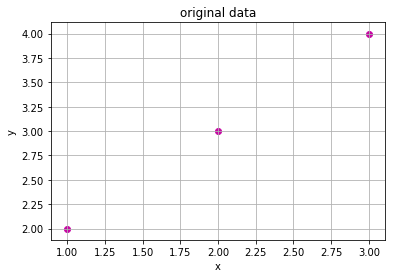

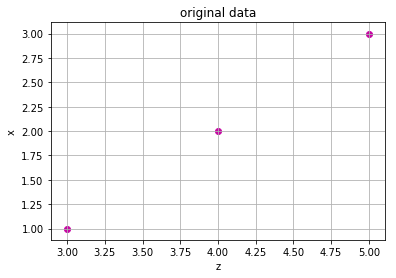

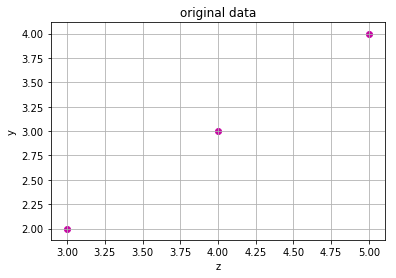

In [4]:
xy = np.vstack([X[:, 0], X[:, 1]]).T
binary_visualize(xy, xlabel="x", title="original data",
                     ylabel="y")

zx = np.vstack([X[:, 2], X[:, 0]]).T
binary_visualize(zx, xlabel="z", title="original data",
                     ylabel="x")

zy = np.vstack([X[:, 2], X[:, 1]]).T
binary_visualize(zy, xlabel="z", title="original data",
                     ylabel="y")

In [5]:
principal_components, scaled_X = Decomposition.pca(X, num_components=nc, return_scaled=True)

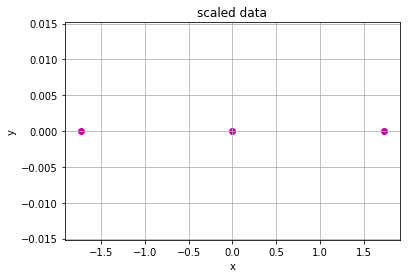

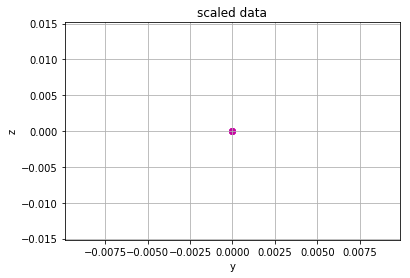

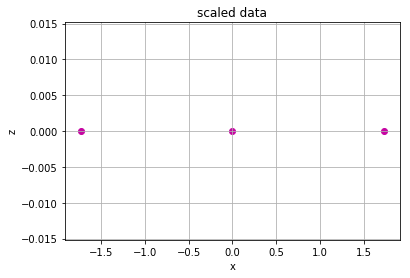

In [6]:
xy = np.vstack([scaled_X[:, 0], scaled_X[:, 1]]).T
binary_visualize(xy, xlabel="x", title="scaled data",
                     ylabel="y")
yz = np.vstack([scaled_X[:, 1], scaled_X[:, 2]]).T
binary_visualize(yz, xlabel="y", title="scaled data",
                     ylabel="z")
xz = np.vstack([scaled_X[:, 0], scaled_X[:, 2]]).T
binary_visualize(xz, xlabel="x", title="scaled data",
                     ylabel="z")

In [7]:
principal_components

array([[ 0.57735027,  0.        , -0.81649658],
       [ 0.57735027, -0.70710678,  0.40824829],
       [ 0.57735027,  0.70710678,  0.40824829]])

In [8]:
scaled_X

array([[-1.73205081,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 1.73205081,  0.        , -0.        ]])

In [9]:
reconstructed_x = np.dot(scaled_X, principal_components.T) + X.mean(axis=0)
print(reconstructed_x)

[[1. 2. 3.]
 [2. 3. 4.]
 [3. 4. 5.]]


In [10]:
np.allclose(X, reconstructed_x)

True